# IS 4487 Assignment 5: Exploratory Data Analysis (EDA) with Stakeholder Framing

In this assignment, you will:
- Load and explore a hotel bookings dataset
- Identify stakeholder needs and frame your analysis around business goals
- Practice data summarization and visualization
- Draw insights that could lead to actionable business recommendations

## Why This Matters

These skills are essential for business majors and minors working in areas like marketing, operations, finance, or consulting. Understanding how to explore and communicate data-driven insights helps you make better decisions and contribute to real-world business outcomes.

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Assignments/assignment_5_eda.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Description: Hotel Bookings

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, segmentation, and trend analysis exercises.


## 1. Setup and Data Loading

Instructions:
- Import `pandas`, `seaborn`, and `matplotlib.pyplot`.
- Load the dataset from this URL:
  https://raw.githubusercontent.com/vandanara/UofUtah_IS4487/refs/heads/main/DataSets/hotels.csv
- Display the first few rows to confirm it loaded correctly.


In [12]:
# Your code to import libraries and load data goes here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# view first few lines of the data
url = "https://raw.githubusercontent.com/vandanara/UofUtah_IS4487/refs/heads/main/DataSets/hotels.csv"
df = pd.read_csv(url)
df['is_canceled'].value_counts()
df.shape

(119390, 32)

## 2. Stakeholder and Business Context

Business framing:  

Every analysis should serve a decision-maker. Before you explore the data, identify who cares about hotel booking behavior and what they might want to know. Your analysis should be framed around those needs.

### In your markdown:
1. Who are the key stakeholders for this dataset?
2. What goals might each stakeholder have?
3. What is a clear, specific business problem statement that this data can help answer?





### ✍️ Your Response:
1. Hotel Management, Marketing & Operation Teams, and Guests

2.  - Management: Increase profitability, reduce cancellations, and improve guest satisfaction.
    - Marketing & Operation: Identify target segments, design effective campaigns, and maximize booking conversion.
    - Guests: Experience better value, smoother service, and more personalized offers.

3. The dataset can certainly help identify the 37% cancellation rate among the listed hotels in this dataset. Roughly, 44224 cancellation occured. This allows management to understand booking behavior to improve forecasts, optimize pricing, and improve guest satisfaction



## 3. Explore Data Structure and Quality

Business framing:  

Before diving into analysis, analysts need to understand the shape and health of the data. Bad data leads to bad decisions.

- Use at least 3 techniques to examine structure and quality:
  - Summary info (e.g., `.info()`, `.describe()`)
  - missing/null value checks
  - Duplicate row checks
   - outliers
- Flag any issues you notice (e.g., missing values, formatting problems)

### In your markdown:
1. What structural issues or problems did you find?
2. What actions would you recommend to clean or prepare this dataset for use?



In [22]:
# Add your code here
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()
Q1 = df['is_canceled'].quantile(0.25)
Q3 = df['is_canceled'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['is_canceled'] < Q1 - 1.5 * IQR) | (df['is_canceled'] > Q3 + 1.5 * IQR)]
print(f"\nNumber of outliers in 'is_canceled' is: {len(outliers)}")
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

np.int64(31994)

### ✍️ Your Response:
1. - '*is_canceled*' is stored as an int64, but it only takes values 0 (not canceled) and 1 (canceled), making it a binary categorical variable
    - There's missing values as shown in *df.info()* specifically in columns *company*, *agent*, and *children*
    - As shown by *df.duplicated().sum()* there seems to be 31994 duplicated records
2. - convert objects fields to categorical dtypes ie (hotel, is_canceled)
    - handle missing values as shown above
    - get rid of the outliers as shown by the IQR method
    - get rid of the duplicate


## 4. Univariate Analysis

Business framing:  

Hotels care about trends like average stay length, customer mix, and pricing. A good EDA starts with understanding single variables and their distribution.

- Select at least 3 individual variables to explore
- Use plots and summaries to describe the distribution
- Focus on what matters from a business standpoint (e.g., pricing, cancellations, guest types)

### In your markdown:
1. Variable 1 – What did you explore and what did you find?
2. Variable 2 – What did you explore and what did you find?
3. Variable 3 – What did you explore and what did you find?




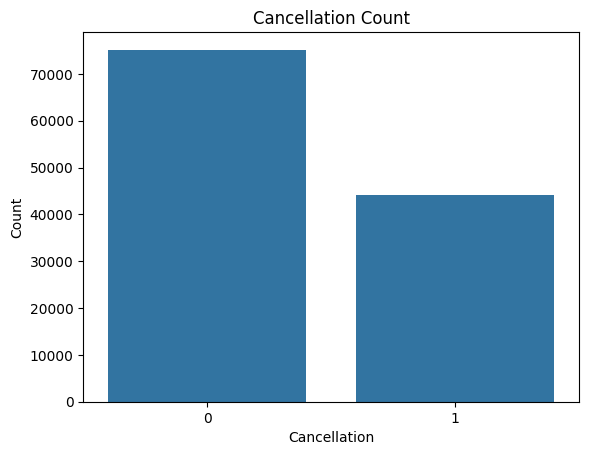

In [27]:
# Your code for univariate analysis (e.g., plots, value counts)
sns.countplot(data=df, x='is_canceled')
plt.title('Cancellation Count')
plt.xlabel('Cancellation')
plt.ylabel('Count')
plt.show()

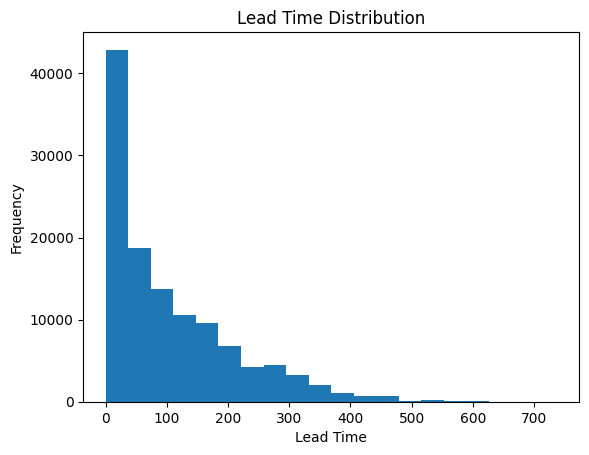

In [28]:
plt.hist(df['lead_time'], bins=20)
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.title('Lead Time Distribution')
plt.show()

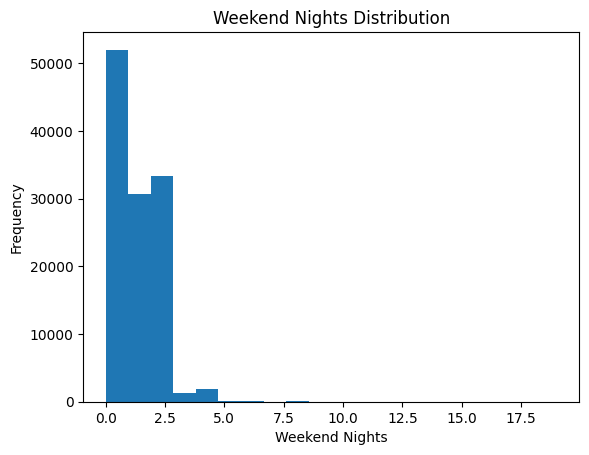

In [30]:
plt.hist(df['stays_in_weekend_nights'], bins=20)
plt.xlabel('Weekend Nights')
plt.ylabel('Frequency')
plt.title('Weekend Nights Distribution')
plt.show()

### ✍️ Your Response:
- **Variable 1 – Observing the Cancelation plot chart, there's a high number of cancelation hotels and resort have been experiencing, totaling almost 40%**
- **Variable 2 – Most bookings are made within the first 50 days, with a steep drop-off afterward, showing that guests typically book close to their stay.**  
- **Variable 3 – Most guests stay 1–2 weekend nights, with very few booking longer weekend stays, indicating that hotels mainly serve short trips**  


## 5. Bivariate Analysis

Business framing:  

Stakeholders often ask: “What drives cancellations?” or “Do longer stays mean higher revenue?” Bivariate analysis helps you uncover those kinds of relationships.

- Choose 2 relevant variable pairs (e.g., `lead_time` vs. `is_canceled`, or `adr` vs. `customer_type`)
- Use scatterplots, grouped bar plots, or boxplots to explore the relationships
- Interpret what these relationships could mean for the hotel business

### In your markdown:
1. Relationship 1 – What did you analyze and what insights did you find?
2. Relationship 2 – What did you analyze and what insights did you find?



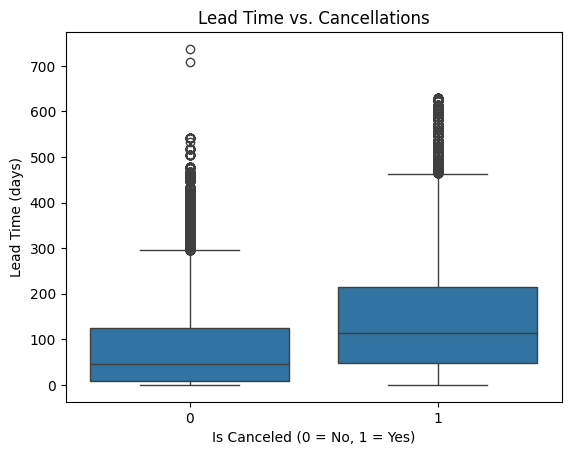

In [31]:
# Your code to analyze variable relationships (e.g., scatterplots, grouped bars)
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title("Lead Time vs. Cancellations")
plt.xlabel("Is Canceled (0 = No, 1 = Yes)")
plt.ylabel("Lead Time (days)")
plt.show()



### ✍️ Your Response:
- **Relationship 1:** Lead Time vs. Cancellations
Longer lead times show higher cancellation risk, while short-term bookings are more reliable.

- **Relationship 2:** ADR vs. Customer Type
Transient guests pay higher rates than contract or group customers, guiding pricing by segment.



## 6. Problem Complexity and Analytics Framing

Business framing:  

Let’s say you found a strong trend — maybe high lead times predict cancellations, or certain channels bring repeat guests. What kind of problem is this?

- Choose one insight from your earlier analysis
- Reflect on:
  - What type of complexity this problem represents (e.g., variety, volume, variability)
  - What kind of analytics would help solve or explain it (descriptive, diagnostic, predictive, prescriptive)

### In your markdown:
1. What was your selected insight?
2. What kind of complexity does it involve?
3. What type of analytics would help, and why?



### ✍️ Your Response:
1. Longer lead times are more likely to get cancelled.
2. This insight represents variation, as the customer actions change significantly based on when they make the booking.
3. A predictive analytics approach would be most appropriate to capture this knowledge to aid decision making. By fitting a model to lead time (among other factors), hotels can estimate the probability of cancellation given a new booking. Hotel managers can take preventative measures.



##7. Final Takeaways and Recommendations

Business framing:  

Imagine you’re preparing for a stakeholder meeting. What would you highlight from your findings?

- Identify your top 2–3 insights or patterns
- Connect each to a stakeholder need or business goal
- Make one recommendation based on the analysis

### In your markdown:
1. What patterns or trends stood out?
2. How do they connect to stakeholder goals?
3. What recommendation would you make based on this analysis?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response:

1. High cancellations with long lead times, meaning, customers booking far in advance are much more likely to cancel

2. Pricing varies by customer type, transient guests tend to pay higher rates than contract or group customers.

3. Most guests stay only 1–4 nights, indicating that short stays (both weekday and weekend) dominate hotel demand.

4. For this assignment, I was able to gain further practice in the usage of EDA to identify business insights (i.e. influence of lead time on cancellations) and linking these to actual decisions made in the hotels. This assignment allowed me to retain most of what Lab 5 & Demo 5 taught me.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas


In [32]:
!jupyter nbconvert --to html "assignment_05_LastnameFirstname.ipynb"

[NbConvertApp] Converting notebook assignment_05_LastnameFirstname.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 405258 bytes to assignment_05_LastnameFirstname.html
